# Salary Predictions Based on Years of Experience using scikit-learn library

## Importing Libraries

In [1]:
import numpy as np # (Numerical Python) For linear algebra and mathematical computations

import pandas as pd # (Python and data analysis) For data processing and manipulation, CSV file I/O

import matplotlib.pyplot as plt # For visualization of the data

import seaborn as sns # For statistical graphics plotting with beautiful styles and color

## Importing the dataset

In [2]:
df = pd.read_csv('E:\Others\ML\Salary Predictor/Salary.csv')

In [3]:
x = df.iloc[:, :-1].values    # Features => Years of experience => Independent Variable
y = df.iloc[:, -1].values     # Target => Salary => Dependent Variable

# loc is label-based, which means that you have to specify rows and columns based on their row and column labels.
# E.g. : df.loc[row_label, column_label] -> This will retrieve data at particular label.
#        df.loc[:, column_label] -> This will retrieve all the data rows of particular column.
#        df.loc[r1:r2, column_label] -> This will retrieve data from row r1 to r2 of particular column.
#        df.loc[row_label, :] -> This will retrieve all the data columns of particular row.
#        df.loc[row_label, c1:c2] -> This will retrieve data from column c1 to c2 of particular row.

# iloc is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).
# E.g. : df.iloc[row_position, column_position] -> This will retrieve data at particular positiion.
#        df.iloc[:, column_position] -> This will retrieve all the data rows of particular column.
#        df.iloc[r1:r2, column_position] -> This will retrieve data from row r1 to r2 of particular column.
#        df.iloc[row_position, :] -> This will retrieve all the data columns of particular row.
#        df.iloc[row_position, c1:c2] -> This will retrieve data from column c1 to c2 of particular row.

# df.loc[row_label, column_label].values -> Return Series as ndarray or ndarray-like depending on the dtype.
# df.loc[row_label, column_label].value_counts -> Return a series containing counts of unique values.
# df.loc[row_label, column_label].sort_values -> Sort a series in ascending/descending order by some criterion (default is ascending).
# s1.count() -> Returns the number of non-null/NA elements in series s1.

In [4]:
# x

In [5]:
# y

## Checking if there is any null value present in the dataset

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Dividing the dataset into two parts: training data and testing data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

# random_state => seed value used by random number generator
# random_state is basically used for reproducing your problem the same every time it is run. If there is no random_state provided the system will use a random_state that is generated internally, so every time you make the split you might get a different set of train and test data points and the behavior will be unpredictable. This will not help you in debugging in case you get an issue as you do not know the random number that was generated when you ran the program.

In [8]:
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

## Implementing the linear regression

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
predictions = model.predict(x_test)

## Visualising the prediction
Creating a scatter plot between Salary and Experinece (in years). Also plotting the linear regression model on same plot.

### Training dataset

Text(0, 0.5, 'Salary')

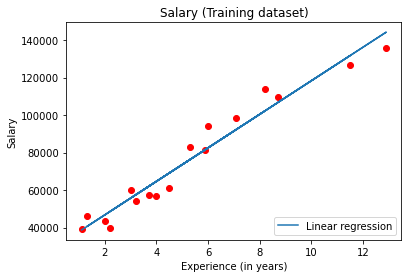

In [11]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train), '-', label='Linear regression')
plt.legend(loc='lower right')
plt.title('Salary (Training dataset)')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary')

### Testing dataset

Text(0, 0.5, 'Salary')

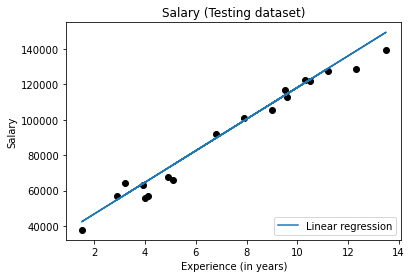

In [12]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, model.predict(x_test), '-', label='Linear regression')
plt.legend(loc='lower right')
plt.title('Salary (Testing dataset)')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary')

## Comparing the actual salary and predicted salary

In [13]:
compare = pd.DataFrame(x_test, columns=["Experience (in years)"])
compare["Actual Salary"] = y_test
compare["Predicted Salary"] = np.round(predictions)
compare

,Experience (in years),Actual Salary,Predicted Salary
0,10.5,121872,122720.0
1,6.8,91738,89673.0
2,5.1,66029,74489.0
3,10.3,122391,120934.0
4,7.9,101302,99498.0
5,4.9,67938,72703.0
6,3.9,63218,63771.0
7,1.5,37731,42335.0
8,4.0,55794,64665.0
9,9.6,112635,114682.0


Text(0, 0.5, 'Salary')

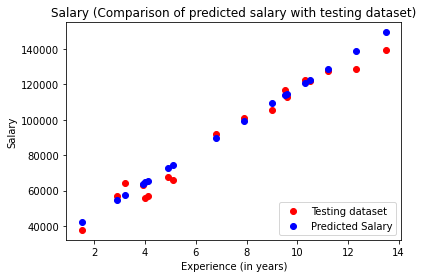

In [14]:
plt.scatter(x_test, y_test, color='red', label='Testing dataset')
plt.scatter(x_test, predictions, color='blue', label='Predicted Salary')
plt.legend(loc='lower right')
plt.title('Salary (Comparison of predicted salary with testing dataset)')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary')

## Plotting the error in prediction

Text(0.5, 1.0, 'Error in prediction')

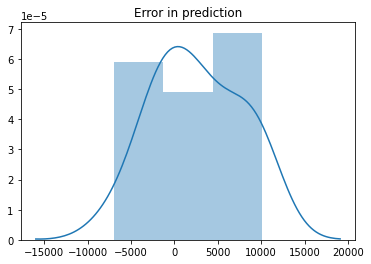

In [15]:
sns.distplot(predictions-y_test).set_title('Error in prediction')

## R-squared (R<sup>2</sup>) score
Accuracy is a measure for classification, not regression, so we can't calculate accuracy for a regression model. For regression, one of the matrices used is R-squared (R<sup>2</sup>) score.
We can get the R<sup>2</sup> score (i.e accuracy) of your prediction using the score(X, y, sample_weight=None) function from LinearRegression

In [16]:
model.score(x_test, y_test)

0.9680372261185924